In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings(action="ignore")
df = pd.read_csv('CreditCard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<a href="https://colab.research.google.com/github/amirghnt/ColabProjectOfTheMaster/blob/main/CCC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df = df.drop(['CUST_ID'], axis=1)

In [5]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
df_copy = df.copy()
print(f'before using IQR we have {df_copy.shape[0]} rows')
# delete outliers of BALANCE
Q1_BALANCE = df_copy['BALANCE'].quantile(0.25)
Q3_BALANCE = df_copy['BALANCE'].quantile(0.75)
IQR_BALANCE = 1.5 * (Q3_BALANCE - Q1_BALANCE)
df_copy = df_copy[~((df_copy['BALANCE'] < (Q1_BALANCE - IQR_BALANCE)) | (df_copy['BALANCE'] > (Q3_BALANCE + IQR_BALANCE)))]
# delete outliers of BALANCE_FREQUENCY
Q1_BALANCE_FREQUENCY = df_copy['BALANCE_FREQUENCY'].quantile(0.25)
Q3_BALANCE_FREQUENCY = df_copy['BALANCE_FREQUENCY'].quantile(0.75)
IQR_BALANCE_FREQUENCY = 1.5 * (Q3_BALANCE_FREQUENCY - Q1_BALANCE_FREQUENCY)
df_copy = df_copy[~((df_copy['BALANCE_FREQUENCY'] < (Q1_BALANCE_FREQUENCY - IQR_BALANCE_FREQUENCY)) | (df_copy['BALANCE_FREQUENCY'] > (Q3_BALANCE_FREQUENCY + IQR_BALANCE_FREQUENCY)))]
# delete outliers of PURCHASES
Q1_PURCHASES = df_copy['PURCHASES'].quantile(0.25)
Q3_PURCHASES = df_copy['PURCHASES'].quantile(0.75)
IQR_PURCHASES = 1.5 * (Q3_PURCHASES - Q1_PURCHASES)
df_copy = df_copy[~((df_copy['PURCHASES'] < (Q1_PURCHASES - IQR_PURCHASES)) | (df_copy['PURCHASES'] > (Q3_PURCHASES + IQR_PURCHASES)))]
# delete outliers of ONEOFF_PURCHASES
Q1_ONEOFF_PURCHASES = df_copy['ONEOFF_PURCHASES'].quantile(0.25)
Q3_ONEOFF_PURCHASES = df_copy['ONEOFF_PURCHASES'].quantile(0.75)
IQR_ONEOFF_PURCHASES = 1.5 * (Q3_ONEOFF_PURCHASES - Q1_ONEOFF_PURCHASES)
df_copy = df_copy[~((df_copy['ONEOFF_PURCHASES'] < (Q1_ONEOFF_PURCHASES - IQR_ONEOFF_PURCHASES)) | (df_copy['ONEOFF_PURCHASES'] > (Q3_ONEOFF_PURCHASES + IQR_ONEOFF_PURCHASES)))]
# delete outliers of INSTALLMENTS_PURCHASES
Q1_INSTALLMENTS_PURCHASES = df_copy['INSTALLMENTS_PURCHASES'].quantile(0.25)
Q3_INSTALLMENTS_PURCHASES = df_copy['INSTALLMENTS_PURCHASES'].quantile(0.75)
IQR_INSTALLMENTS_PURCHASES = 1.5 * (Q3_INSTALLMENTS_PURCHASES - Q1_INSTALLMENTS_PURCHASES)
df_copy = df_copy[~((df_copy['INSTALLMENTS_PURCHASES'] < (Q1_INSTALLMENTS_PURCHASES - IQR_INSTALLMENTS_PURCHASES)) | (df_copy['INSTALLMENTS_PURCHASES'] > (Q3_INSTALLMENTS_PURCHASES + IQR_INSTALLMENTS_PURCHASES)))]
# delete outliers of CASH_ADVANCE
Q1_CASH_ADVANCE = df_copy['CASH_ADVANCE'].quantile(0.25)
Q3_CASH_ADVANCE = df_copy['CASH_ADVANCE'].quantile(0.75)
IQR_CASH_ADVANCE = 1.5 * (Q3_CASH_ADVANCE - Q1_CASH_ADVANCE)
df_copy = df_copy[~((df_copy['CASH_ADVANCE'] < (Q1_CASH_ADVANCE - IQR_CASH_ADVANCE)) | (df_copy['CASH_ADVANCE'] > (Q3_CASH_ADVANCE + IQR_CASH_ADVANCE)))]
# delete outliers of PURCHASES_FREQUENCY
Q1_PURCHASES_FREQUENCY = df_copy['PURCHASES_FREQUENCY'].quantile(0.25)
Q3_PURCHASES_FREQUENCY = df_copy['PURCHASES_FREQUENCY'].quantile(0.75)
IQR_PURCHASES_FREQUENCY = 1.5 * (Q3_PURCHASES_FREQUENCY - Q1_PURCHASES_FREQUENCY)
df_copy = df_copy[~((df_copy['PURCHASES_FREQUENCY'] < (Q1_PURCHASES_FREQUENCY - IQR_PURCHASES_FREQUENCY)) | (df_copy['PURCHASES_FREQUENCY'] > (Q3_PURCHASES_FREQUENCY + IQR_PURCHASES_FREQUENCY)))]
# delete outliers of ONEOFF_PURCHASES_FREQUENCY
Q1_ONEOFF_PURCHASES_FREQUENCY = df_copy['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.25)
Q3_ONEOFF_PURCHASES_FREQUENCY = df_copy['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.75)
IQR_ONEOFF_PURCHASES_FREQUENCY = 1.5 * (Q3_ONEOFF_PURCHASES_FREQUENCY - Q1_ONEOFF_PURCHASES_FREQUENCY)
df_copy = df_copy[~((df_copy['ONEOFF_PURCHASES_FREQUENCY'] < (Q1_ONEOFF_PURCHASES_FREQUENCY - IQR_ONEOFF_PURCHASES_FREQUENCY)) | (df_copy['ONEOFF_PURCHASES_FREQUENCY'] > (Q3_ONEOFF_PURCHASES_FREQUENCY + IQR_ONEOFF_PURCHASES_FREQUENCY)))]
# delete outliers of PURCHASES_INSTALLMENTS_FREQUENCY
Q1_PURCHASES_INSTALLMENTS_FREQUENCY = df_copy['PURCHASES_INSTALLMENTS_FREQUENCY'].quantile(0.25)
Q3_PURCHASES_INSTALLMENTS_FREQUENCY = df_copy['PURCHASES_INSTALLMENTS_FREQUENCY'].quantile(0.75)
IQR_PURCHASES_INSTALLMENTS_FREQUENCY = 1.5 * (Q3_PURCHASES_INSTALLMENTS_FREQUENCY - Q1_PURCHASES_INSTALLMENTS_FREQUENCY)
df_copy = df_copy[~((df_copy['PURCHASES_INSTALLMENTS_FREQUENCY'] < (Q1_PURCHASES_INSTALLMENTS_FREQUENCY - IQR_PURCHASES_INSTALLMENTS_FREQUENCY)) | (df_copy['PURCHASES_INSTALLMENTS_FREQUENCY'] > (Q3_PURCHASES_INSTALLMENTS_FREQUENCY + IQR_PURCHASES_INSTALLMENTS_FREQUENCY)))]
# delete outliers of CASH_ADVANCE_FREQUENCY
Q1_CASH_ADVANCE_FREQUENCY = df_copy['CASH_ADVANCE_FREQUENCY'].quantile(0.25)
Q3_CASH_ADVANCE_FREQUENCY = df_copy['CASH_ADVANCE_FREQUENCY'].quantile(0.75)
IQR_CASH_ADVANCE_FREQUENCY = 1.5 * (Q3_CASH_ADVANCE_FREQUENCY - Q1_CASH_ADVANCE_FREQUENCY)
df_copy = df_copy[~((df_copy['CASH_ADVANCE_FREQUENCY'] < (Q1_CASH_ADVANCE_FREQUENCY - IQR_CASH_ADVANCE_FREQUENCY)) | (df_copy['CASH_ADVANCE_FREQUENCY'] > (Q3_CASH_ADVANCE_FREQUENCY + IQR_CASH_ADVANCE_FREQUENCY)))]
# delete outliers of CASH_ADVANCE_TRX
Q1_CASH_ADVANCE_TRX = df_copy['CASH_ADVANCE_TRX'].quantile(0.25)
Q3_CASH_ADVANCE_TRX = df_copy['CASH_ADVANCE_TRX'].quantile(0.75)
IQR_CASH_ADVANCE_TRX = 1.5 * (Q3_CASH_ADVANCE_TRX - Q1_CASH_ADVANCE_TRX)
df_copy = df_copy[~((df_copy['CASH_ADVANCE_TRX'] < (Q1_CASH_ADVANCE_TRX - IQR_CASH_ADVANCE_TRX)) | (df_copy['CASH_ADVANCE_TRX'] > (Q3_CASH_ADVANCE_TRX + IQR_CASH_ADVANCE_TRX)))]
# delete outliers of PURCHASES_TRX
Q1_PURCHASES_TRX = df_copy['PURCHASES_TRX'].quantile(0.25)
Q3_PURCHASES_TRX = df_copy['PURCHASES_TRX'].quantile(0.75)
IQR_PURCHASES_TRX = 1.5 * (Q3_PURCHASES_TRX - Q1_PURCHASES_TRX)
df_copy = df_copy[~((df_copy['PURCHASES_TRX'] < (Q1_PURCHASES_TRX - IQR_PURCHASES_TRX)) | (df_copy['PURCHASES_TRX'] > (Q3_PURCHASES_TRX + IQR_PURCHASES_TRX)))]
# delete outliers of CREDIT_LIMIT
Q1_CREDIT_LIMIT = df_copy['CREDIT_LIMIT'].quantile(0.25)
Q3_CREDIT_LIMIT = df_copy['CREDIT_LIMIT'].quantile(0.75)
IQR_CREDIT_LIMIT = 1.5 * (Q3_CREDIT_LIMIT - Q1_CREDIT_LIMIT)
df_copy = df_copy[~((df_copy['CREDIT_LIMIT'] < (Q1_CREDIT_LIMIT - IQR_CREDIT_LIMIT)) | (df_copy['CREDIT_LIMIT'] > (Q3_CREDIT_LIMIT + IQR_CREDIT_LIMIT)))]
# delete outliers of PAYMENTS
Q1_PAYMENTS = df_copy['PAYMENTS'].quantile(0.25)
Q3_PAYMENTS = df_copy['PAYMENTS'].quantile(0.75)
IQR_PAYMENTS = 1.5 * (Q3_PAYMENTS - Q1_PAYMENTS)
df_copy = df_copy[~((df_copy['PAYMENTS'] < (Q1_PAYMENTS - IQR_PAYMENTS)) | (df_copy['PAYMENTS'] > (Q3_PAYMENTS + IQR_PAYMENTS)))]
# delete outliers of MINIMUM_PAYMENTS
Q1_MINIMUM_PAYMENTS = df_copy['MINIMUM_PAYMENTS'].quantile(0.25)
Q3_MINIMUM_PAYMENTS = df_copy['MINIMUM_PAYMENTS'].quantile(0.75)
IQR_MINIMUM_PAYMENTS = 1.5 * (Q3_MINIMUM_PAYMENTS - Q1_MINIMUM_PAYMENTS)
df_copy = df_copy[~((df_copy['MINIMUM_PAYMENTS'] < (Q1_MINIMUM_PAYMENTS - IQR_MINIMUM_PAYMENTS)) | (df_copy['MINIMUM_PAYMENTS'] > (Q3_MINIMUM_PAYMENTS + IQR_MINIMUM_PAYMENTS)))]
# delete outliers of PRC_FULL_PAYMENT
Q1_PRC_FULL_PAYMENT = df_copy['PRC_FULL_PAYMENT'].quantile(0.25)
Q3_PRC_FULL_PAYMENT = df_copy['PRC_FULL_PAYMENT'].quantile(0.75)
IQR_PRC_FULL_PAYMENT = 1.5 * (Q3_PRC_FULL_PAYMENT - Q1_PRC_FULL_PAYMENT)
df_copy = df_copy[~((df_copy['PRC_FULL_PAYMENT'] < (Q1_PRC_FULL_PAYMENT - IQR_PRC_FULL_PAYMENT)) | (df_copy['PRC_FULL_PAYMENT'] > (Q3_PRC_FULL_PAYMENT + IQR_PRC_FULL_PAYMENT)))]
# delete outliers of TENURE
Q1_TENURE = df_copy['TENURE'].quantile(0.25)
Q3_TENURE = df_copy['TENURE'].quantile(0.75)
IQR_TENURE = 1.5 * (Q3_TENURE - Q1_TENURE)
df_copy = df_copy[~((df_copy['TENURE'] < (Q1_TENURE - IQR_TENURE)) | (df_copy['TENURE'] > (Q3_TENURE + IQR_TENURE)))]
print(f'after using IQR we have {df_copy.shape[0]} rows')

before using IQR we have 8950 rows
after using IQR we have 2090 rows


In [9]:
df_copy2 = df.copy()
print(f'before using Zscore we have {df_copy2.shape[0]} rows')
z_scores = stats.zscore(df_copy2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_copy2 = df_copy2[filtered_entries]
print(f'after using Zscore we have {df_copy2.shape[0]} rows')

before using Zscore we have 8950 rows
after using Zscore we have 7434 rows


In [10]:
df2 = df_copy2
df2.shape


(7434, 17)

In [11]:
df2_normilized = np.asarray(df2)
scale = StandardScaler()
df2_normilized = scale.fit_transform(df2_normilized)
df2_normilized = pd.DataFrame(df2_normilized, columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])
df2_normilized

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.756687,-0.654440,-0.358761,-0.057990,-0.636612,-0.406721,0.035966,1.069739,-0.910579,0.096509,0.173950,-0.334531,-1.192081,-0.834962,-0.610734,-0.531523,-4.697636
7430,-0.800266,-0.068638,-0.575218,-0.543505,-0.313852,-0.543984,0.982164,-0.668791,0.999753,-0.690806,-0.587319,-0.334531,-1.021765,-0.859750,-0.616355,-0.531523,-4.697636
7431,-0.263862,-0.654440,-0.734487,-0.543505,-0.636612,0.390178,-1.225631,-0.668791,-0.910579,0.096509,0.173950,-0.797517,-0.953638,-0.798391,-0.322151,-0.531523,-4.697636
7432,-0.745849,0.517164,-0.304400,-0.543505,0.234966,-0.543984,0.666765,-0.668791,0.681364,-0.690806,-0.587319,-0.400671,-1.021765,-0.785516,-0.596957,-0.531523,-4.697636


In [12]:
df2_normilized.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,7434.0,-6.114739e-16,1.000067,-0.836598,-0.756916,-0.316066,0.316784,4.304272
BALANCE_FREQUENCY,7434.0,5.281938e-15,1.000067,-3.317178,0.091127,0.517164,0.517164,0.517164
PURCHASES,7434.0,4.331423e-16,1.000067,-0.734487,-0.688955,-0.382464,0.263562,6.407676
ONEOFF_PURCHASES,7434.0,4.922489e-15,1.000067,-0.543505,-0.543505,-0.499397,0.111813,6.384011
INSTALLMENTS_PURCHASES,7434.0,3.837244e-16,1.000067,-0.636612,-0.636612,-0.460884,0.239413,5.528233
CASH_ADVANCE,7434.0,-2.053353e-15,1.000067,-0.543984,-0.543984,-0.543984,0.175923,5.310751
PURCHASES_FREQUENCY,7434.0,-7.186432e-16,1.000067,-1.225631,-1.015366,0.035966,1.087298,1.297564
ONEOFF_PURCHASES_FREQUENCY,7434.0,-7.694940e-15,1.000067,-0.668791,-0.668791,-0.379037,0.200474,2.808268
PURCHASES_INSTALLMENTS_FREQUENCY,7434.0,-8.796658e-16,1.000067,-0.910579,-0.910579,-0.486060,0.999753,1.636530
CASH_ADVANCE_FREQUENCY,7434.0,-1.432701e-15,1.000067,-0.690806,-0.690806,-0.690806,0.358950,3.889942


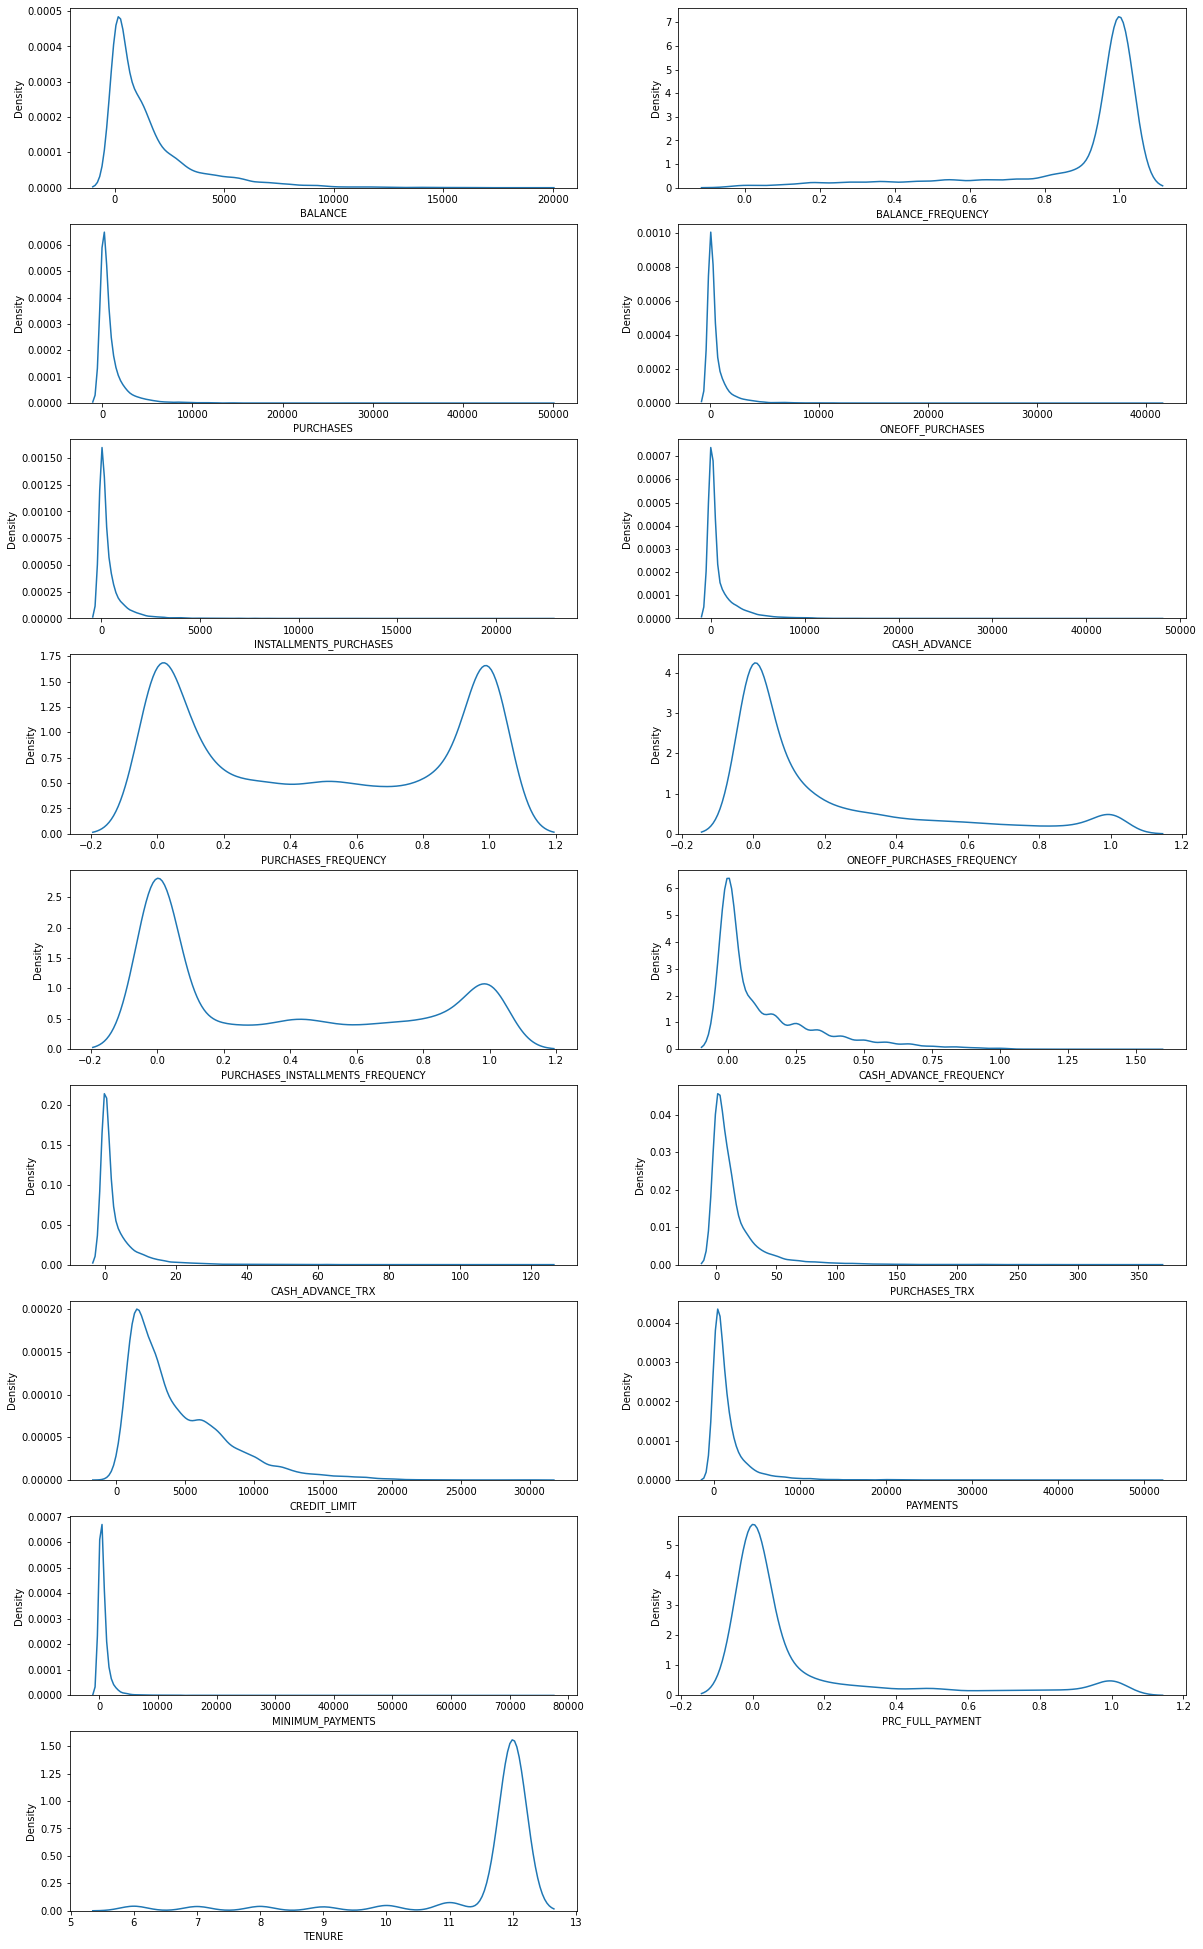

In [13]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df2_normilized.columns):
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

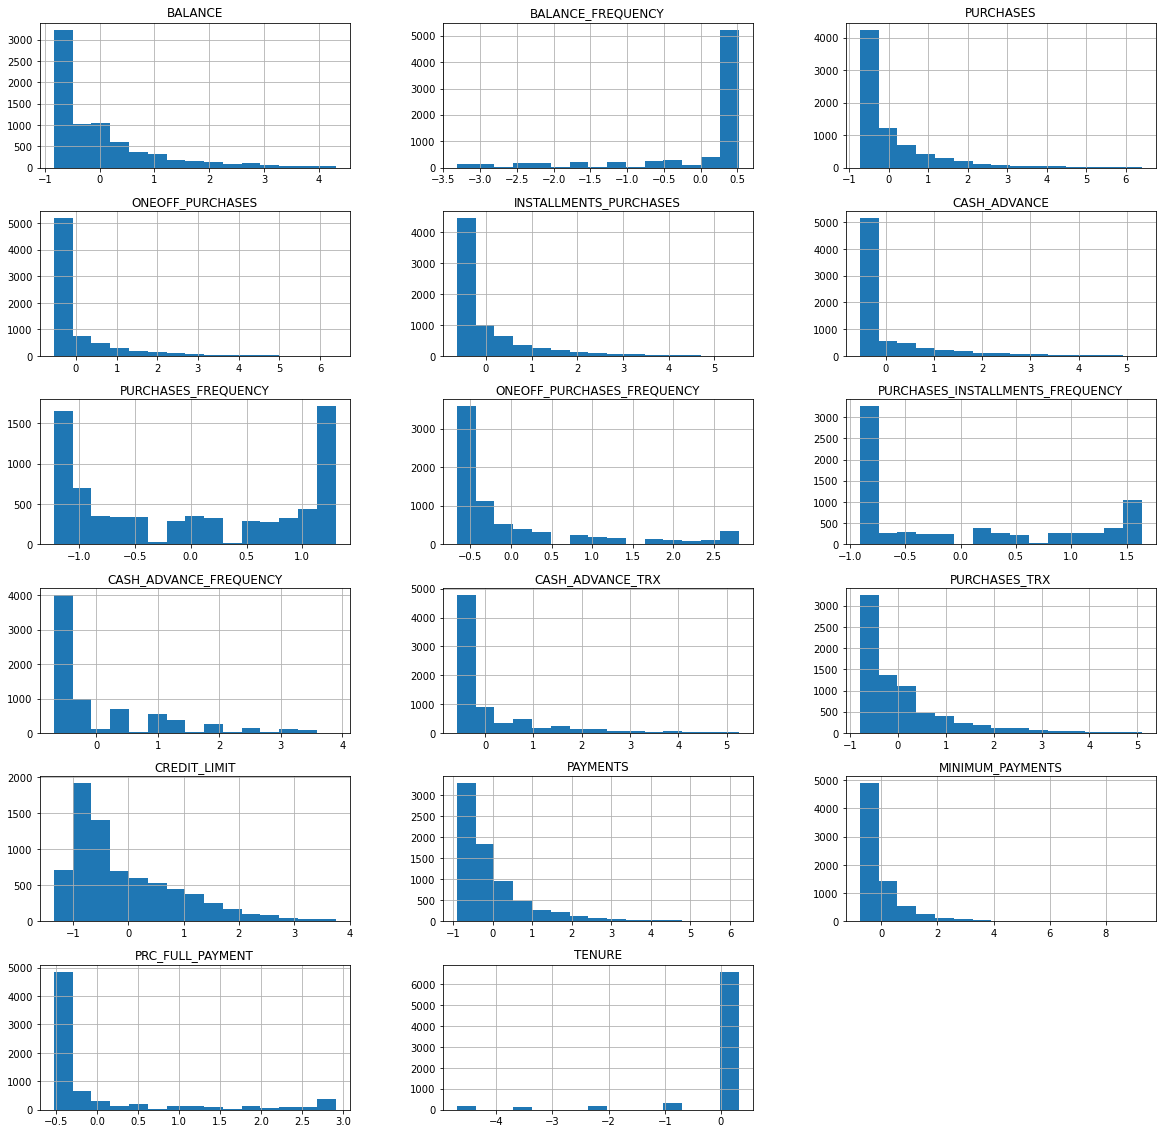

<Figure size 720x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
numerical_features = [feature for feature in df2_normilized.columns if df2_normilized[feature].dtypes != 'object']
df2_normilized[numerical_features].hist(bins=15, figsize=(20, 20), layout=(6, 3))
fig = plt.figure(figsize=(10, 7))
col_list = []
for col in df2_normilized.columns:
    col_list.append(col)
count = len(col_list)
for i in range(count):
    fig = plt.figure()
    fig.suptitle(col_list[i], fontsize=12, fontweight='bold')

Text(0.5, 1.0, 'Correlation Heatmap')

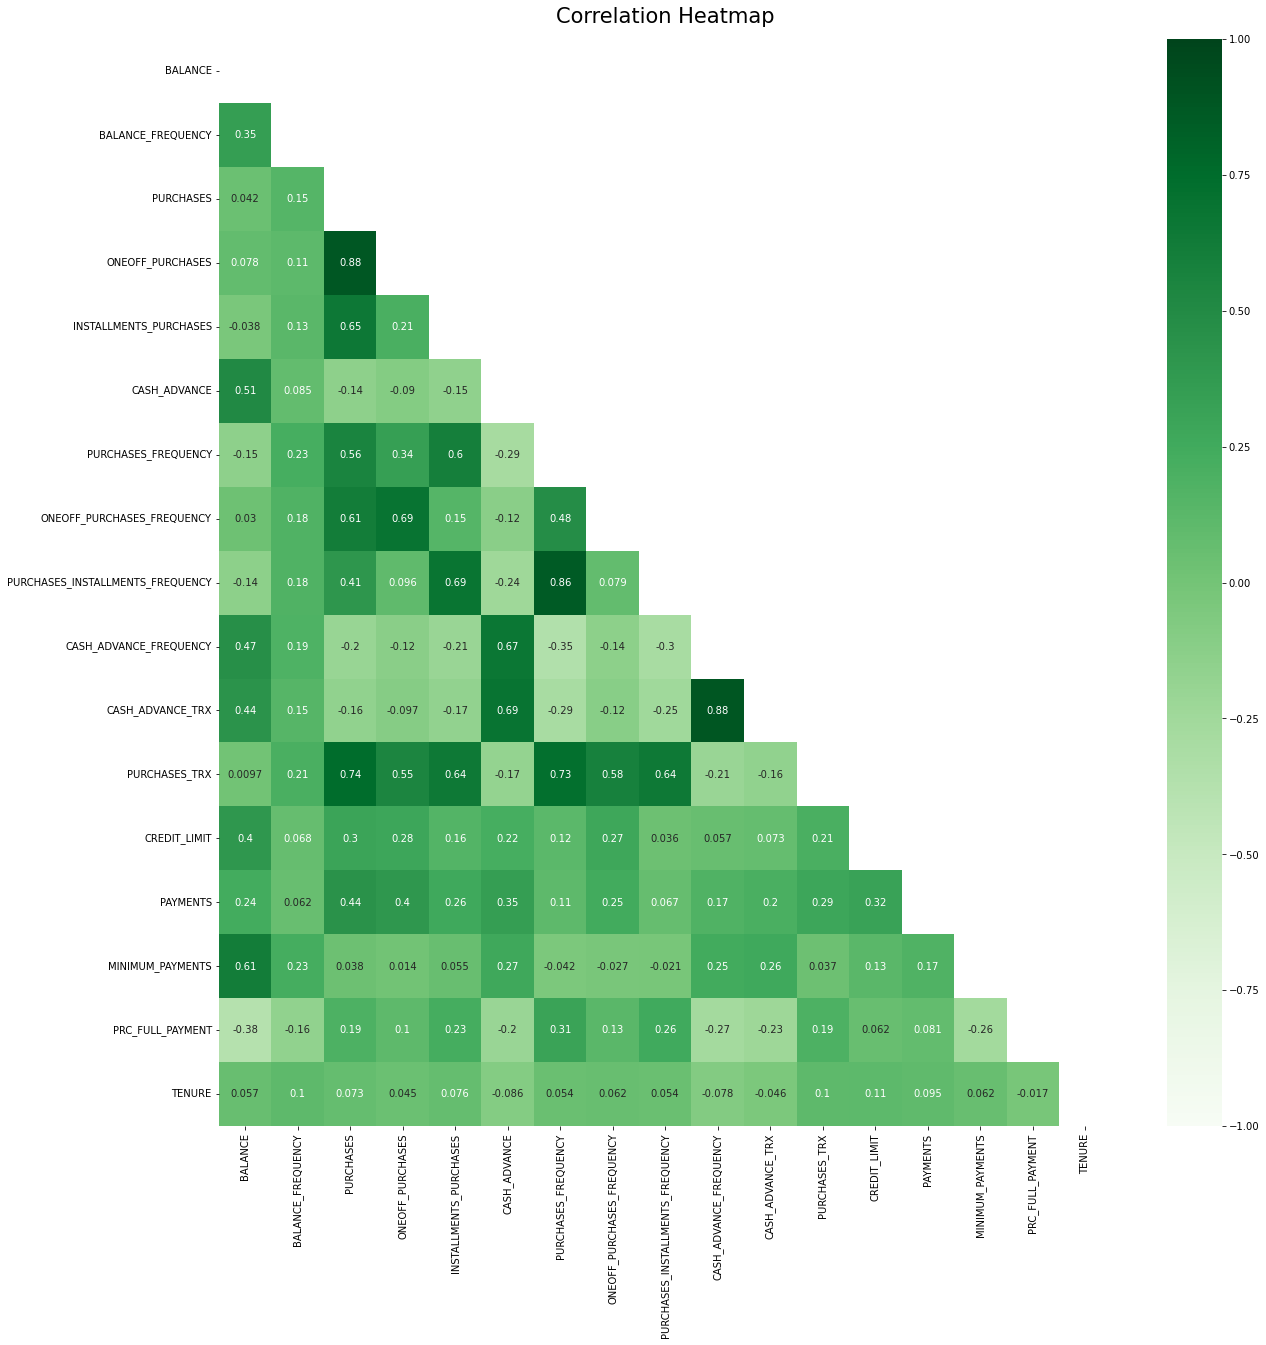

In [15]:
plt.subplots(figsize=(20,20))
mask = np.triu(np.ones_like(df2_normilized.corr()))
heatmap = sns.heatmap(df2_normilized.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':21}, pad=16)

In [16]:
df2.to_csv('Preproccessed.csv', index=False)

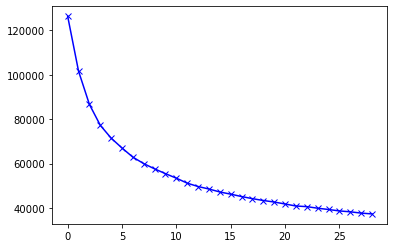

In [17]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df2_normilized)
    cost.append(kmean.inertia_)

plt.plot(cost, 'bx-')  

In [18]:
kmean= KMeans(6)
kmean.fit(df2_normilized)
labels=kmean.labels_
First_Cluster=pd.concat([df2_normilized, pd.DataFrame({'cluster':labels})], axis=1)
First_Cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187,1
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187,3
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187,0
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187,1
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.756687,-0.654440,-0.358761,-0.057990,-0.636612,-0.406721,0.035966,1.069739,-0.910579,0.096509,0.173950,-0.334531,-1.192081,-0.834962,-0.610734,-0.531523,-4.697636,1
7430,-0.800266,-0.068638,-0.575218,-0.543505,-0.313852,-0.543984,0.982164,-0.668791,0.999753,-0.690806,-0.587319,-0.334531,-1.021765,-0.859750,-0.616355,-0.531523,-4.697636,4
7431,-0.263862,-0.654440,-0.734487,-0.543505,-0.636612,0.390178,-1.225631,-0.668791,-0.910579,0.096509,0.173950,-0.797517,-0.953638,-0.798391,-0.322151,-0.531523,-4.697636,1
7432,-0.745849,0.517164,-0.304400,-0.543505,0.234966,-0.543984,0.666765,-0.668791,0.681364,-0.690806,-0.587319,-0.400671,-1.021765,-0.785516,-0.596957,-0.531523,-4.697636,4


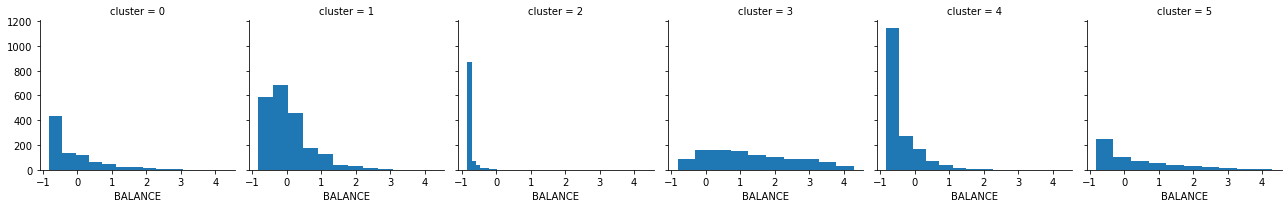

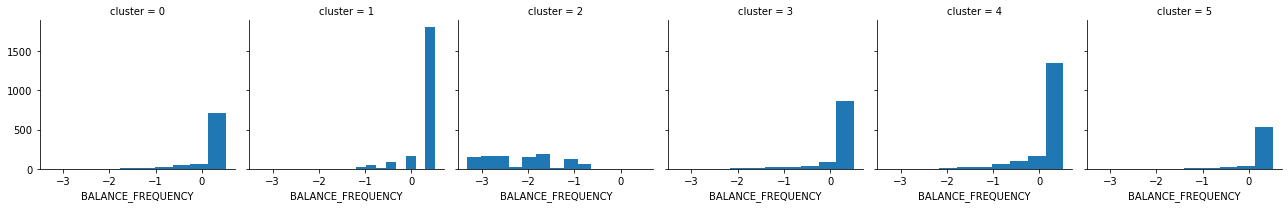

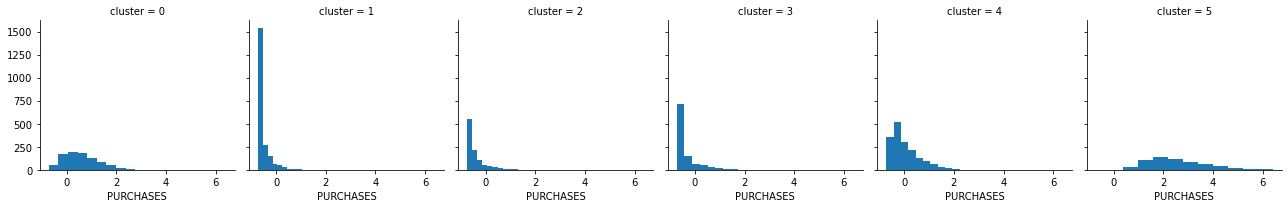

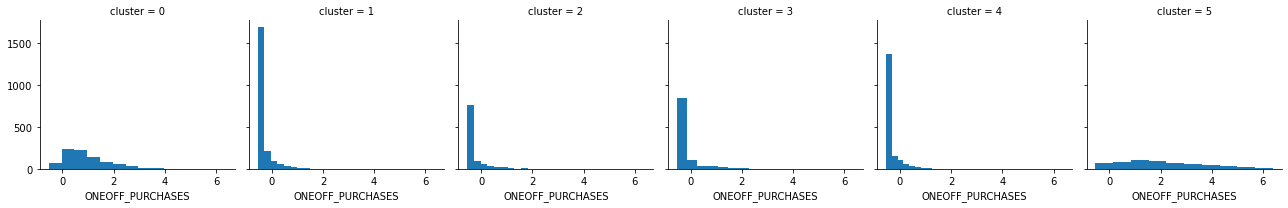

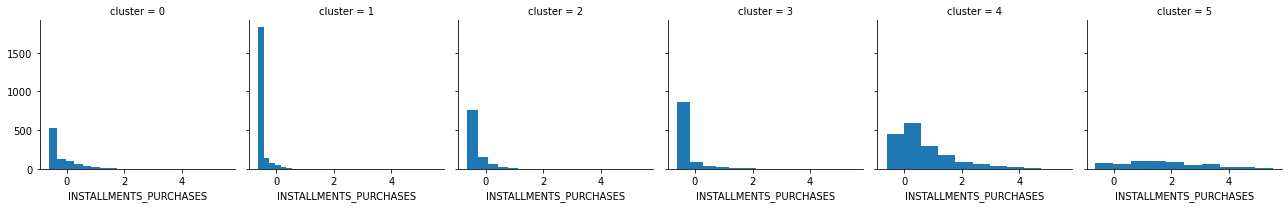

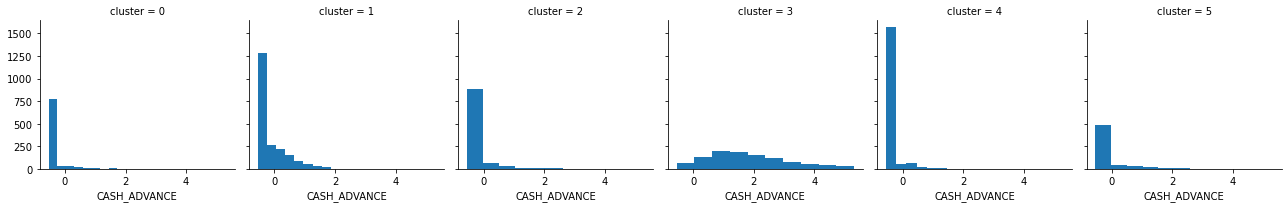

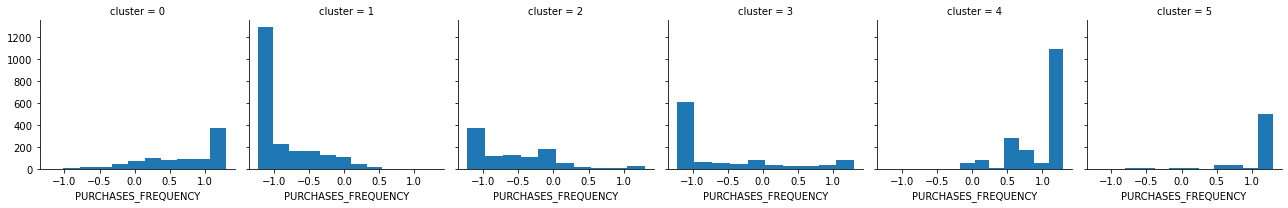

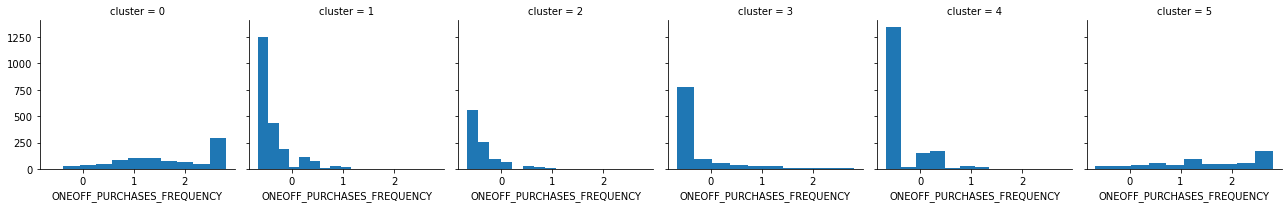

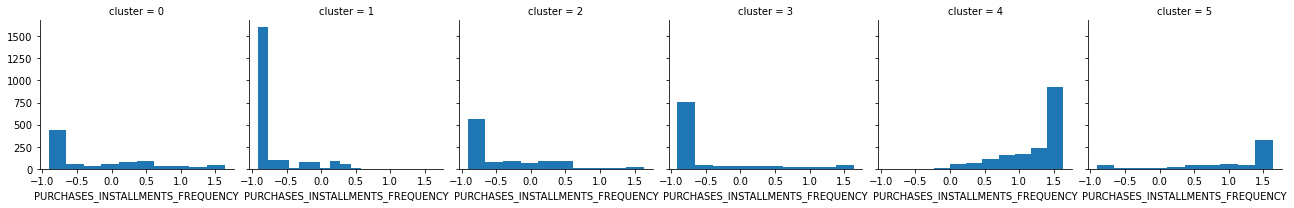

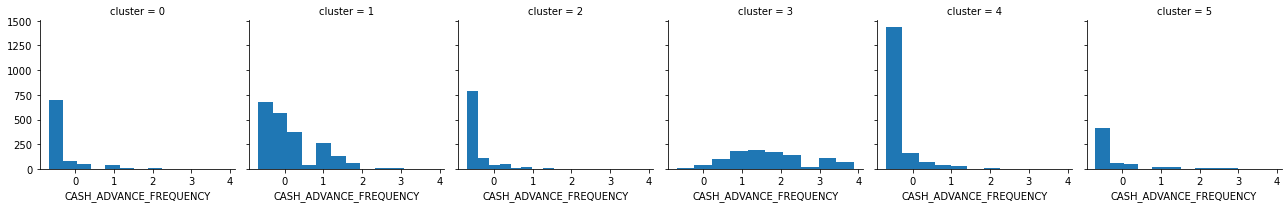

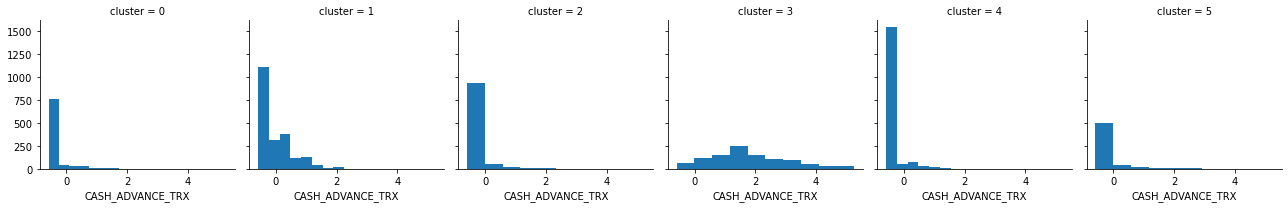

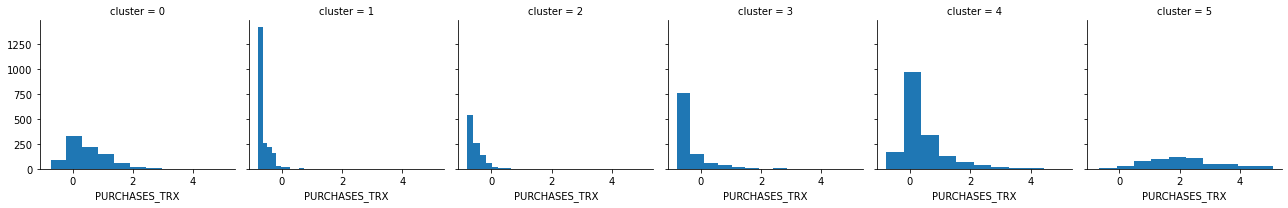

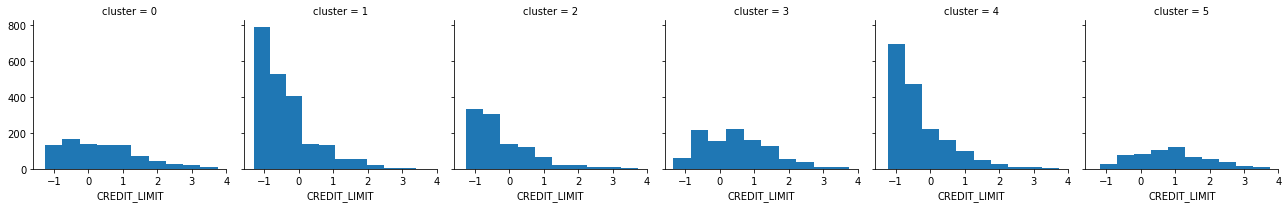

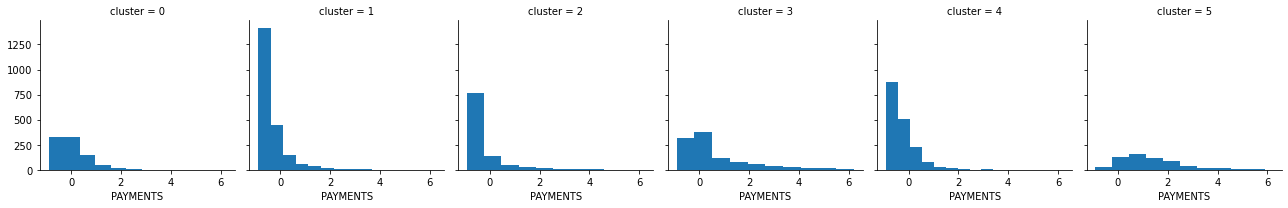

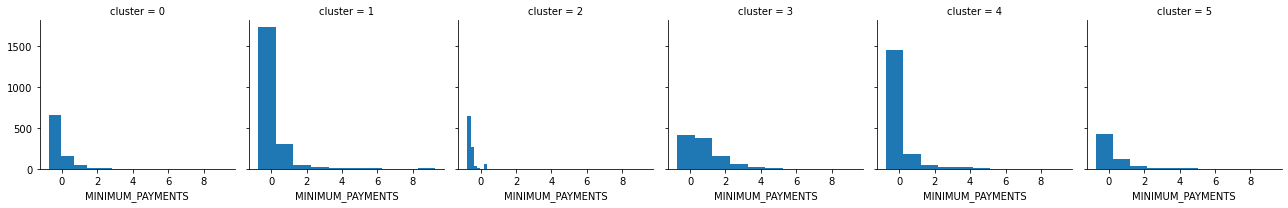

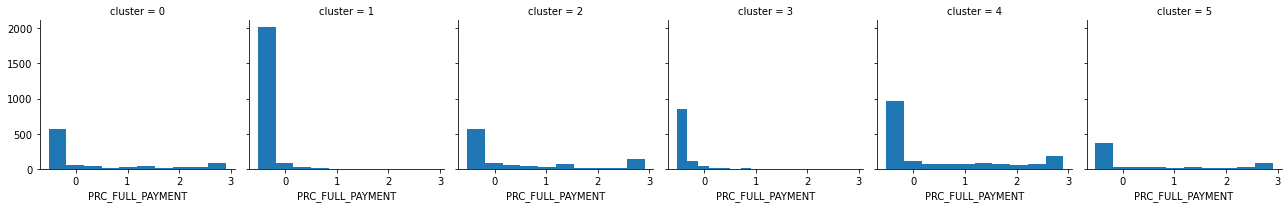

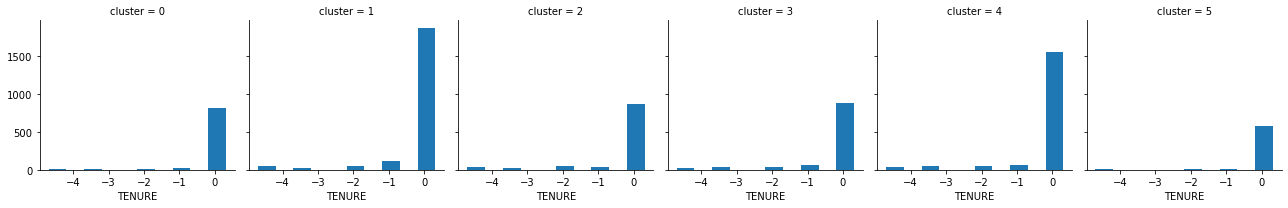

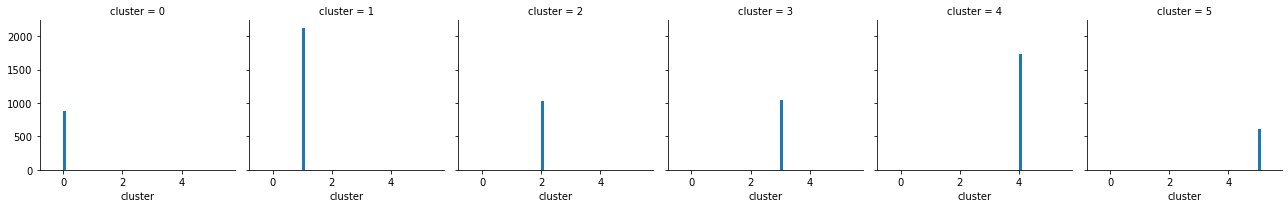

In [19]:
for c in First_Cluster:
    grid= sns.FacetGrid(First_Cluster, col='cluster')
    grid.map(plt.hist, c)

Cluster0 People with average to high credit limit who make all type of purchases

Cluster1 This group has more people with due payments who take advance cash more often

Cluster2 Less money spenders with average to high credit limits who purchases mostly in installments

Cluster3 People with high credit limit who take more cash in advance

Cluster4 High spenders with high credit limit who make expensive purchases

Cluster5 People who don't spend much money and who have average to high credit limit

(Clsuter number changes when re run)

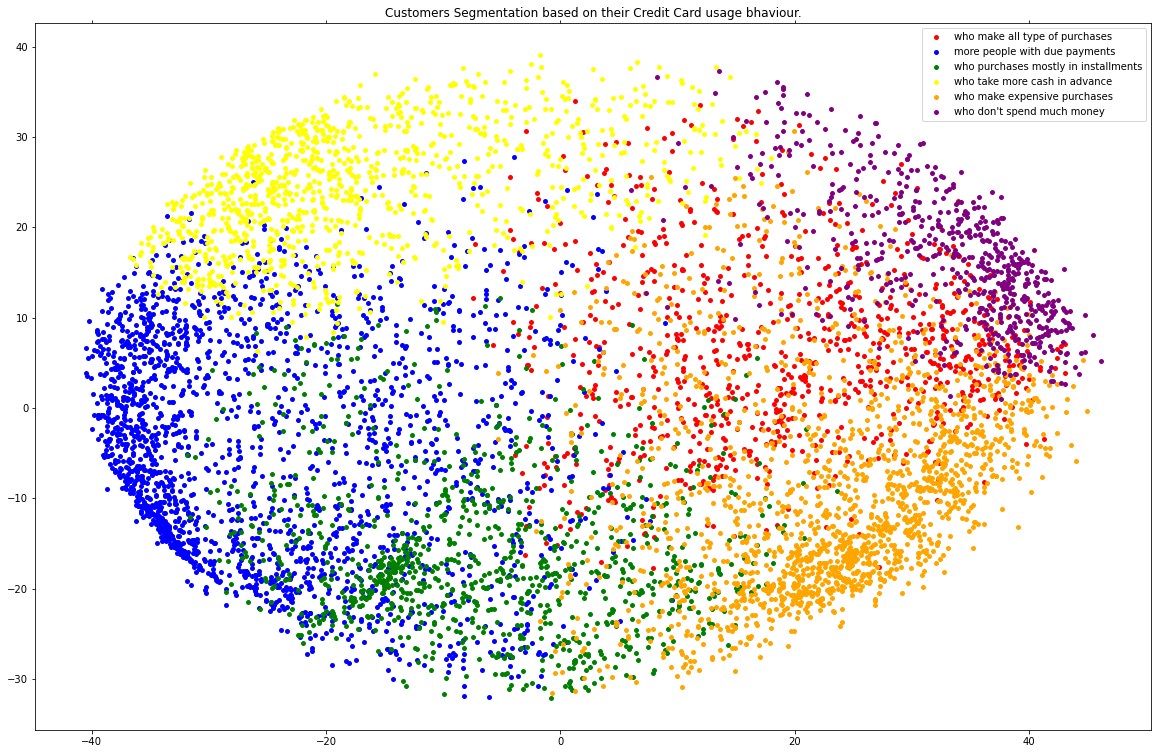

In [20]:
dist = 1 - cosine_similarity(df2_normilized)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape
x, y = X_PCA[:, 0], X_PCA[:, 1]
df_PCA = df2.copy()
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}
  
df_PCA = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df_PCA.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [21]:
df_PCA

,x,y,label
0,-21.633944,-27.196819,1
1,-17.866336,24.351481,3
2,14.175958,10.286162,0
3,-11.380663,3.569994,1
4,-26.246978,-19.816754,1
...,...,...,...
7429,-4.415311,-2.434460,1
7430,5.853298,-9.683619,4
7431,-17.100110,-2.113640,1
7432,5.476105,-8.172672,4


In [22]:
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df2_normilized)

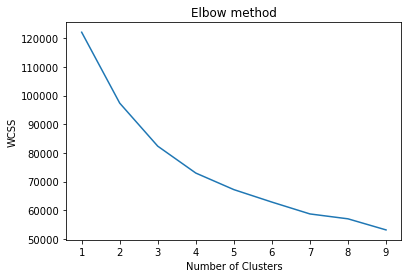

In [23]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

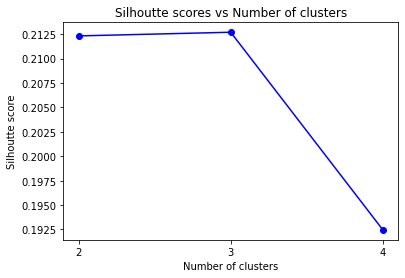

In [24]:
silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [25]:
df2_normilized
Second_Cluster = df2_normilized.copy()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)
Second_Cluster['cluster_id'] = kmeans.labels_
Second_Cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187,1
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187,0
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187,2
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187,1
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.756687,-0.654440,-0.358761,-0.057990,-0.636612,-0.406721,0.035966,1.069739,-0.910579,0.096509,0.173950,-0.334531,-1.192081,-0.834962,-0.610734,-0.531523,-4.697636,1
7430,-0.800266,-0.068638,-0.575218,-0.543505,-0.313852,-0.543984,0.982164,-0.668791,0.999753,-0.690806,-0.587319,-0.334531,-1.021765,-0.859750,-0.616355,-0.531523,-4.697636,1
7431,-0.263862,-0.654440,-0.734487,-0.543505,-0.636612,0.390178,-1.225631,-0.668791,-0.910579,0.096509,0.173950,-0.797517,-0.953638,-0.798391,-0.322151,-0.531523,-4.697636,1
7432,-0.745849,0.517164,-0.304400,-0.543505,0.234966,-0.543984,0.666765,-0.668791,0.681364,-0.690806,-0.587319,-0.400671,-1.021765,-0.785516,-0.596957,-0.531523,-4.697636,1


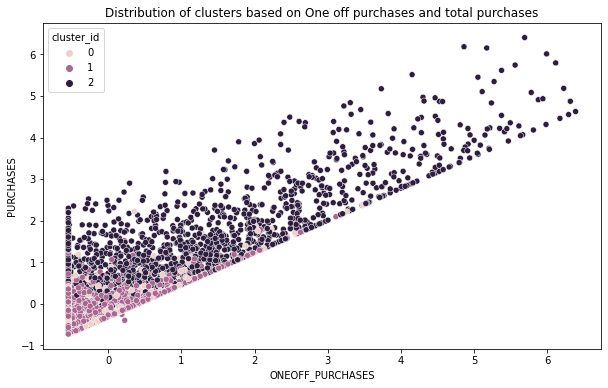

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Second_Cluster, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

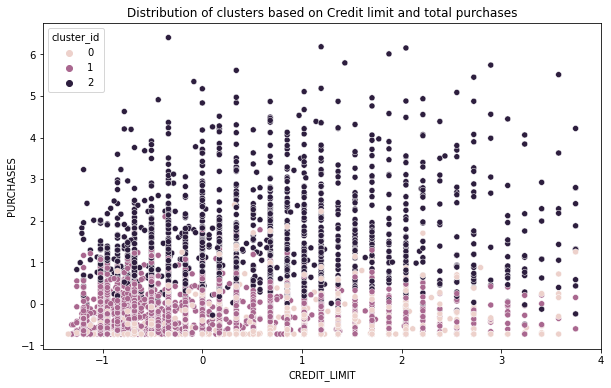

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Second_Cluster, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

In [29]:
df3_copy=df2_normilized.copy()
df3_scaled = df3_copy.copy()
col_names =df3_scaled.columns
features = df3_scaled[col_names]
scaler = StandardScaler()
df3_Standard_Scaler = df3_copy.copy()
df3_Standard_Scaler[col_names] = scaler.fit_transform(features.values)
scaler = RobustScaler()
df3_RobustScaler = df3_copy.copy()
df3_Standard_Scaler
df3_RobustScaler[col_names] = scaler.fit_transform(features.values)
df3_MinMaxScaler = df3_copy.copy()
scaler = MinMaxScaler()
df3_MinMaxScaler[col_names] = scaler.fit_transform(features.values)

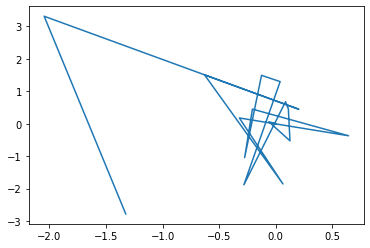

In [30]:
pca = PCA()
df3_pca = pca.fit_transform(df3_Standard_Scaler)
plt.plot(df3_pca[0], df3_pca[1])

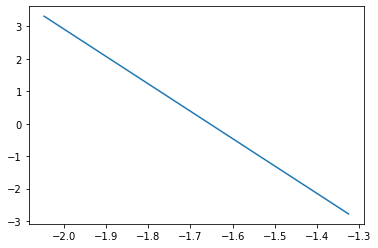

In [31]:
kernel_pca = KernelPCA(n_components=2,kernel='linear')
kernel_pca_df3 = kernel_pca.fit_transform(df3_Standard_Scaler)
plt.plot(kernel_pca_df3[0], kernel_pca_df3[1])

Text(0, 0.5, 'Distortion')

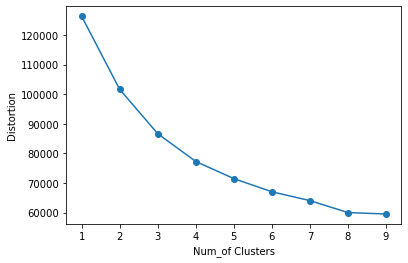

In [32]:
inertia_list=[]
for i in range(1, 10):
    kmean_skl = KMeans(n_clusters=i, n_init=1,max_iter=200)
    kmean_skl.fit(df3_Standard_Scaler)
    inertia_list.append(kmean_skl.inertia_)   
plt.plot(range(1, 10), inertia_list, marker='o')
plt.xlabel('Num_of Clusters')
plt.ylabel('Distortion')

In [33]:
def kmean(df3):
    kmean = KMeans(n_clusters=4, max_iter=100)
    kmean.fit(df3)
    kmean.fit_predict(df3)
    labels_kmean= kmean.labels_
    return labels_kmean
kmean(df2_normilized)
tsne = TSNE(n_components=2).fit_transform(df3_RobustScaler)
labels_kmean=kmean(tsne)
Third_Cluster = df3_RobustScaler.copy()
Third_Cluster["cluster"]=labels_kmean.astype(str)
Third_Cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.459706,-2.000000,-0.271894,-0.067308,0.014631,0.000000,-0.399999,-0.333332,-0.111112,0.000000,0.000000,-0.333333,-0.444444,-0.482280,-0.266556,0.000000,0.000000,1
1,1.480243,-1.000000,-0.369572,-0.067308,-0.200598,7.245236,-0.600000,-0.333332,-0.222223,1.499997,1.333333,-0.466667,0.888889,2.673851,1.373348,1.333329,0.000000,2
2,1.046230,0.000000,0.422055,1.419558,-0.200598,0.000000,0.600000,3.666668,-0.222223,0.000000,0.000000,0.333333,1.000000,-0.142282,0.590946,0.000000,0.000000,0
3,0.537873,-4.000000,1.165212,2.815385,-0.200598,0.231413,-0.500000,0.000000,-0.222223,0.499997,0.333333,-0.400000,1.000000,-0.645539,1.007451,0.000000,0.000000,1
4,0.016950,0.000000,-0.353190,-0.036538,-0.200598,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.000000,-0.400000,-0.400000,-0.096760,-0.081472,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.410376,-2.750003,0.024885,0.673577,-0.200598,0.190668,0.000000,1.666668,-0.222223,0.749999,1.000000,0.000000,-0.555556,-0.566074,-0.311499,0.000000,-5.009823,1
7430,-0.450964,-1.375001,-0.202363,-0.067308,0.167840,0.000000,0.450000,-0.333332,0.777777,0.000000,0.000000,0.000000,-0.444444,-0.594880,-0.319171,0.000000,-5.009823,1
7431,0.048620,-2.750003,-0.369572,-0.067308,-0.200598,1.297615,-0.600000,-0.333332,-0.222223,0.749999,1.000000,-0.466667,-0.400000,-0.523577,0.082364,0.000000,-5.009823,1
7432,-0.400282,0.000000,0.081956,-0.067308,0.794326,0.000000,0.300000,-0.333332,0.611111,0.000000,0.000000,-0.066667,-0.444444,-0.508615,-0.292697,0.000000,-5.009823,1


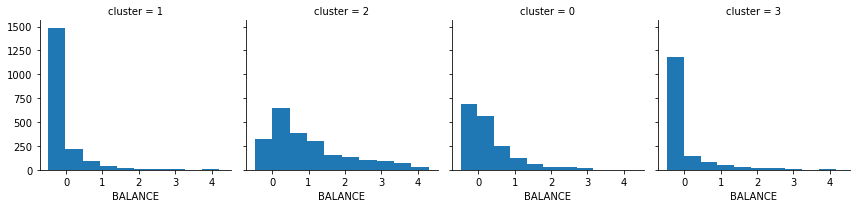

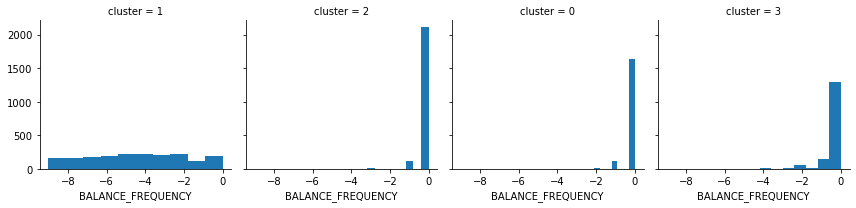

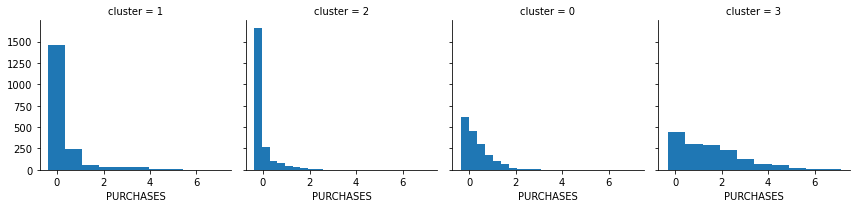

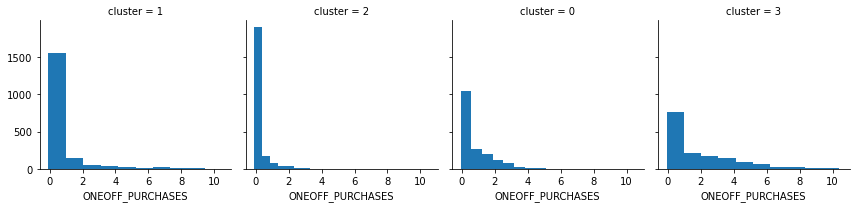

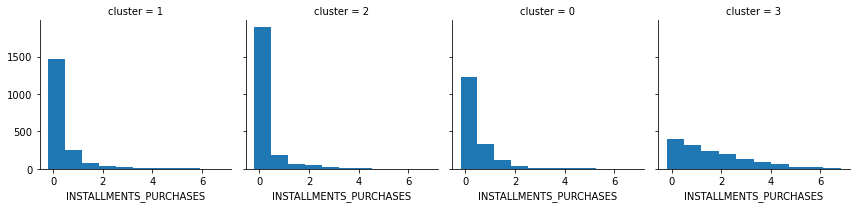

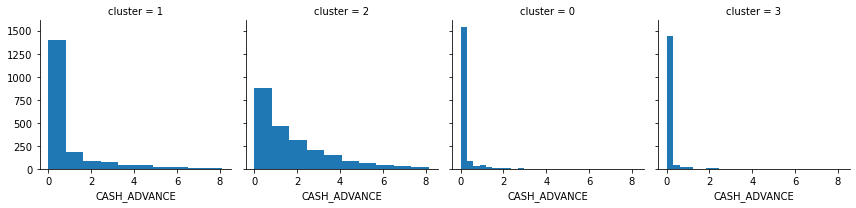

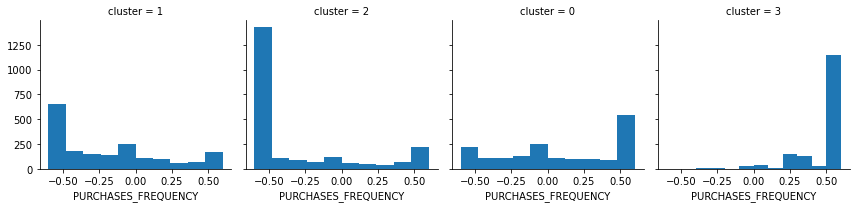

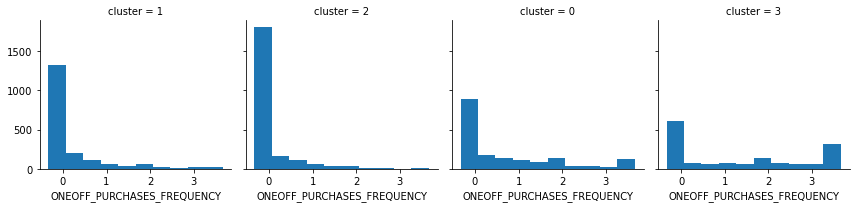

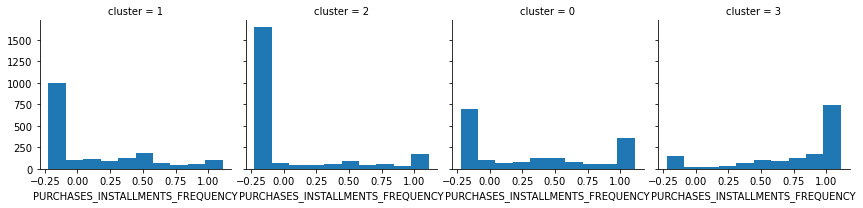

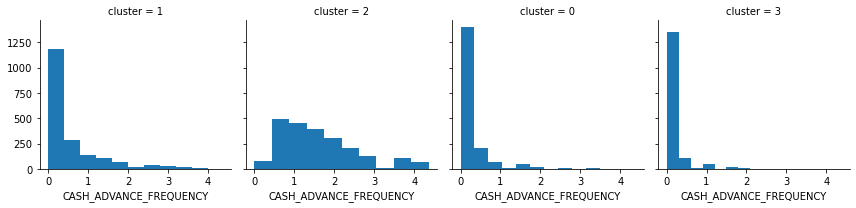

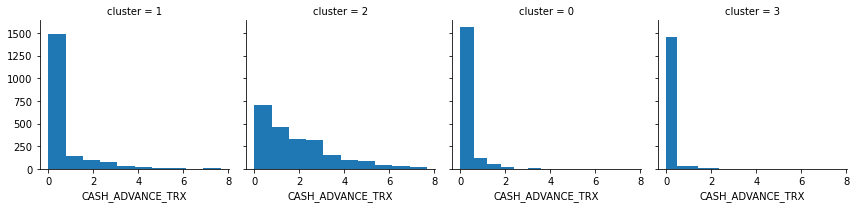

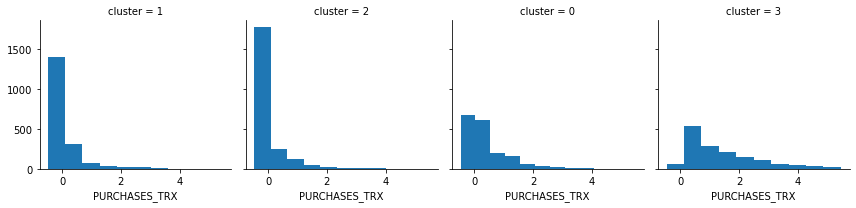

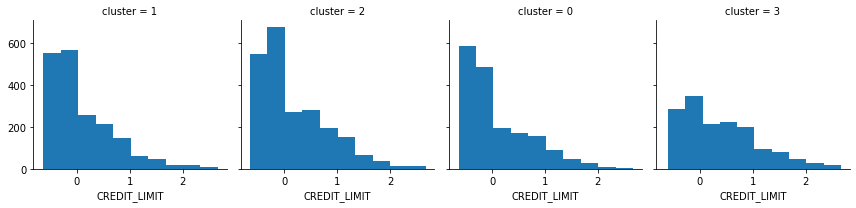

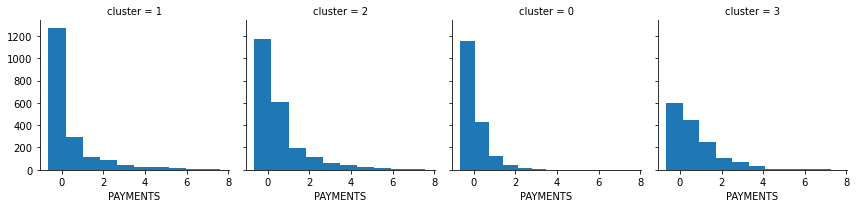

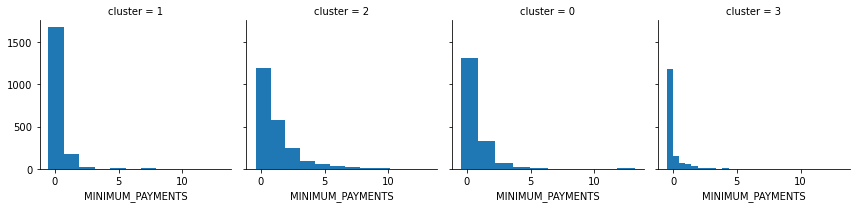

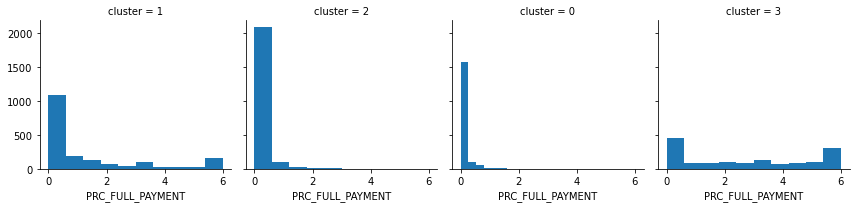

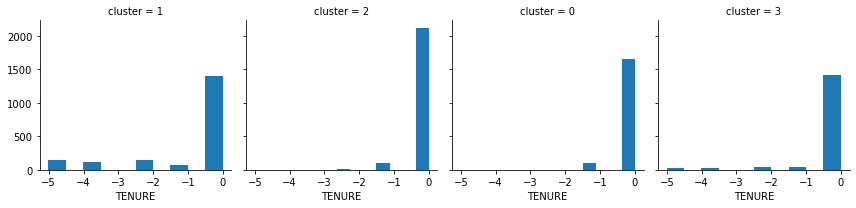

In [34]:
for c in df3_RobustScaler:
    grid= sns.FacetGrid(Third_Cluster, col='cluster')
    grid.map(plt.hist, c)

<AxesSubplot:>

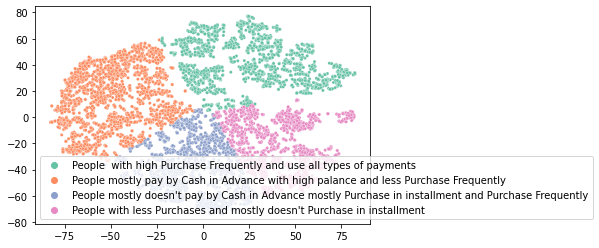

In [35]:
cl = []
for row in Third_Cluster['cluster']:
    if row == "0" :cl.append("People mostly doesn't pay by Cash in Advance mostly Purchase in installment and Purchase Frequently")
    elif row =="1":cl.append("People  with high Purchase Frequently and use all types of payments ")
    elif row =="2":cl.append("People mostly pay by Cash in Advance with high palance and less Purchase Frequently")
    elif row =="3":cl.append("People with less Purchases and mostly doesn't Purchase in installment")
sns.scatterplot(tsne[:,0], tsne[:,1] , hue = cl,s=10,palette="Set2")

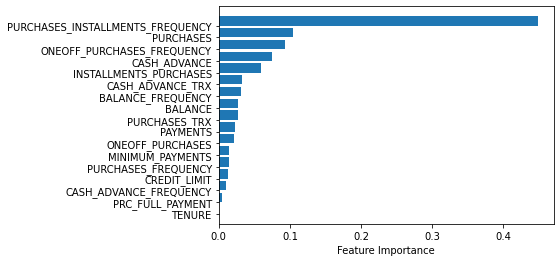

In [36]:
FirstDataFrame = First_Cluster.copy()
# creat a list with cluster column
cluster_list = FirstDataFrame['cluster'].tolist()

# split FirstDataFrame into a test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FirstDataFrame.drop(['cluster'], axis=1), cluster_list, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(range(len(sort)), rf.feature_importances_[sort], align='edge')
plt.yticks(range(len(sort)), FirstDataFrame.drop(['cluster'], axis=1).columns[sort])
plt.xlabel("Feature Importance")
plt.show()

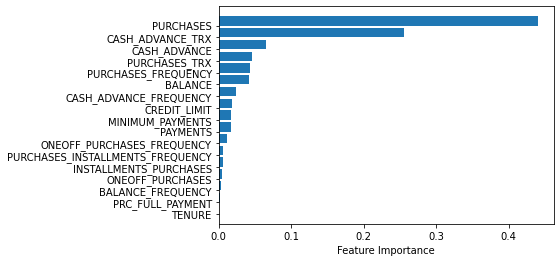

In [37]:
SecondDataFrame = Second_Cluster.copy()
# creat a list with cluster column
cluster_list = SecondDataFrame['cluster_id'].tolist()

# split SecondDataFrame into a test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SecondDataFrame.drop(['cluster_id'], axis=1), cluster_list, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(range(len(sort)), rf.feature_importances_[sort], align='edge')
plt.yticks(range(len(sort)), SecondDataFrame.drop(['cluster_id'], axis=1).columns[sort])
plt.xlabel("Feature Importance")
plt.show()

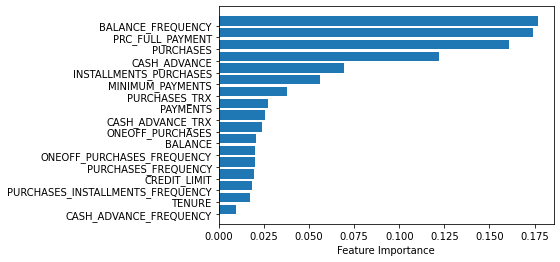

In [38]:
ThirdDataFrame = Third_Cluster.copy()
# creat a list with cluster column
cluster_list = ThirdDataFrame['cluster'].tolist()

# split ThirdDataFrame into a test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ThirdDataFrame.drop(['cluster'], axis=1), cluster_list, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(range(len(sort)), rf.feature_importances_[sort], align='edge')
plt.yticks(range(len(sort)), ThirdDataFrame.drop(['cluster'], axis=1).columns[sort])
plt.xlabel("Feature Importance")
plt.show()

In [39]:
First_Index = First_Cluster['cluster'].tolist()
Second_Index = Second_Cluster['cluster_id'].tolist()
Third_Index = Third_Cluster['cluster'].tolist()

In [40]:
Final1 = df2.copy()
Final2 = df2.copy()
Final3 = df2.copy()


In [41]:
Final1['Cluster'] = First_Index
Final2['Cluster'] = Second_Index
Final3['Cluster'] = Third_Index

In [42]:
Final1.to_csv('Final1.csv', index=False)
Final2.to_csv('Final2.csv', index=False)
Final3.to_csv('Final3.csv', index=False)